# HOMEWORK-4

In [1]:
#sympy library used to express matrices in terms of symbols
# matplot lib used to plot the graph

from sympy import *
from IPython.display import Image,display,HTML
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

from mpl_toolkits.mplot3d.axes3d import get_test_data
init_printing()

thetadot,t=symbols('thetadot,t')
theta,d,a,alpha=symbols('theta,d,a,alpha')
d_1,d_3,d_5,d_7,a_3=symbols('d_1,d_3,d_5,d_7,a_3')
theta_1,theta_2,theta_3,theta_4,theta_5,theta_6,theta_7=symbols('theta_1,theta_2,theta_3,theta_4,theta_5,theta_6,theta_7')
Rot_z_theta=Matrix([[cos(theta),-sin(theta),0,0],
                    [sin(theta),cos(theta),0,0],
                    [0,0,1,0],
                    [0,0,0,1]])
Trans_z_d=Matrix([[1,0,0,0],
                  [0,1,0,0],
                  [0,0,1,d],
                  [0,0,0,1]])
Trans_x_a=Matrix([[1,0,0,a],
                  [0,1,0,0],
                  [0,0,1,0],
                  [0,0,0,1]])
Rot_x_alpha=Matrix([[1,0,0,0],
                   [0,cos(alpha),-sin(alpha),0],
                   [0,sin(alpha),cos(alpha),0],
                   [0,0,0,1]])


In [2]:
# Transfromation matrix for each frame
A=Rot_z_theta*Trans_z_d*Trans_x_a*Rot_x_alpha

In [3]:

# Substituting values form DH table
A_1=A.subs({theta:theta_1,d:d_1,a:0,alpha:pi/2})
A_2=A.subs({theta:theta_2,d:0,a:0,alpha:-pi/2})
A_3=A.subs({theta:0,d:d_3,a:a_3,alpha:-pi/2})
A_4=A.subs({theta:theta_4,d:0,a:-a_3,alpha:pi/2})
A_5=A.subs({theta:theta_5,d:d_5,a:0,alpha:pi/2})
A_6=A.subs({theta:theta_6,d:0,a:a_3,alpha:pi/2})
A_7=A.subs({theta:theta_7,d:d_7,a:0,alpha:0})



In [4]:
# Transformation matrix for each frame with respect to origin

Transformation=A_1*A_2*A_3*A_4*A_5*A_6*A_7
Transformation
T_1=A_1
T_2=A_1*A_2
T_4=A_1*A_2*A_3*A_4
T_5=A_1*A_2*A_3*A_4*A_5
T_6=A_1*A_2*A_3*A_4*A_5*A_6
T_7=A_1*A_2*A_3*A_4*A_5*A_6*A_7


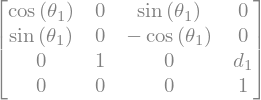

In [5]:
# 1st frame wrt origin
T_1

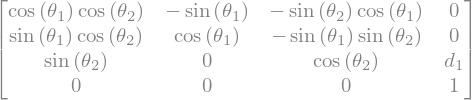

In [6]:
# 2nd frame wrt origin
T_2

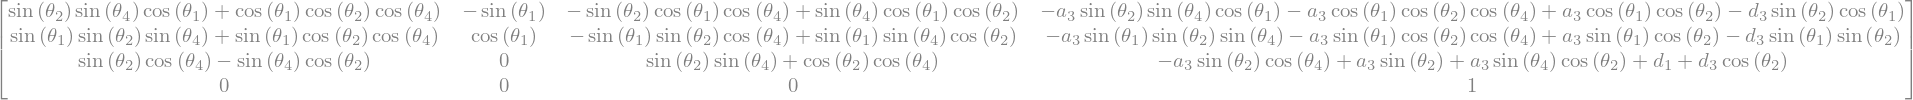

In [7]:
# 4th framw frame wrt origin
T_4

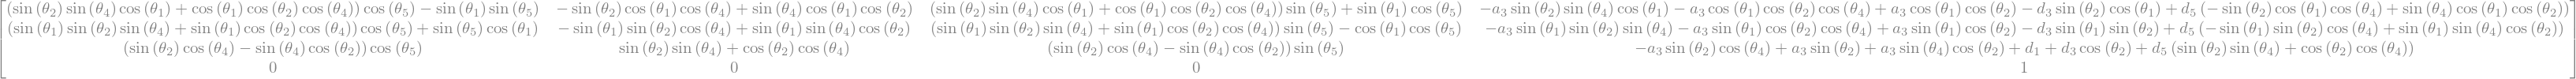

In [8]:
# 5th frame wrt origin
T_5

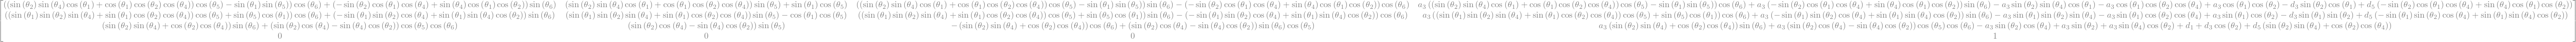

In [9]:
# 6th frame wrt origin
T_6

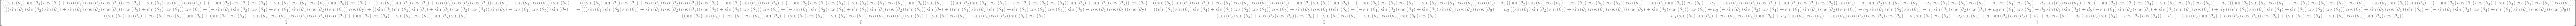

In [10]:
# 7th frame wrt orign
T_7

In [11]:
# End effector position
Xp=Transformation.col(3)
Xp.row_del(3)

In [12]:
# substituting values to end effector positions
Xp_copy=Xp.subs({d_1:33.30,
    d_3:31.60,
    d_5:38.40,
    a_3:8.80,
    d_7:20.7})

In [13]:
# Taking individual x,y,z for the end effector position
x=Xp[0]
y=Xp[1]
z=Xp[2]

In [14]:
# Setting up the Jacobian Matrix 

J=Matrix(([diff(x,theta_1),diff(x,theta_2),diff(x,theta_4),diff(x,theta_5),diff(x,theta_6),diff(x,theta_7)],
        [diff(y,theta_1),diff(y,theta_2),diff(y,theta_4),diff(y,theta_5),diff(y,theta_6),diff(y,theta_7)],
        [diff(z,theta_1),diff(z,theta_2),diff(z,theta_4),diff(z,theta_5),diff(z,theta_6),diff(z,theta_7)],
        [T_1[0,2],T_2[0,2],T_4[0,2],T_5[0,2],T_6[0,2],T_7[0,2]],
        [T_1[1,2],T_2[1,2],T_4[1,2],T_5[1,2],T_6[1,2],T_7[1,2]],
        [T_1[2,2],T_2[2,2],T_4[2,2],T_5[2,2],T_6[2,2],T_7[2,2]]))

In [15]:
# Substituting values to Jacobian Matrix
J=J.subs({d_1:33.30,
    d_3:31.60,
    d_5:38.40,
    a_3:8.80,
    d_7:20.7})

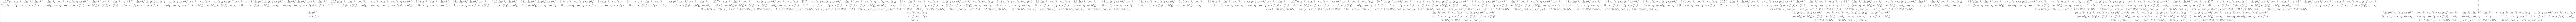

In [16]:
J

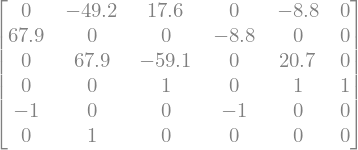

In [67]:
q_current=Matrix(([0],
          [0],
          [pi/2],
          [0],
          [pi],
          [0]))
J_initial=J.subs({theta_1:q_current[0],
    theta_2:q_current[1],
    theta_4:q_current[2],
    theta_5:q_current[3],
    theta_6:q_current[4],
    theta_7:q_current[5]})
J_initial

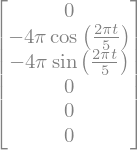

In [17]:
# The velocity matrix for end effector velocity
X_dot=Matrix(([0],
             [-10*sin(pi/2+ thetadot*t)*thetadot],
             [10*cos(pi/2 + thetadot*t)*thetadot],
             [0],
             [0],
             [0]))
X_dot=X_dot.subs({thetadot:(2*pi)/5})
X_dot

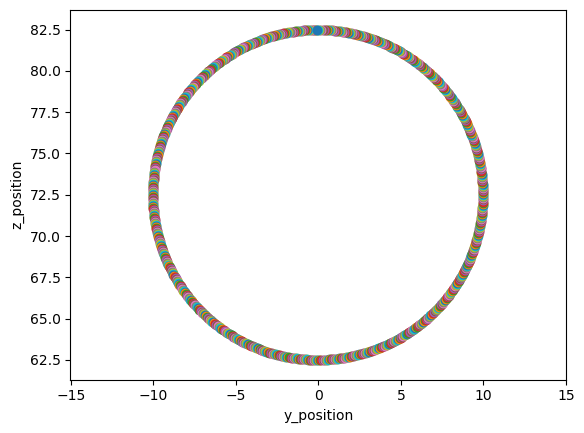

In [63]:
# List1 to store the q_current values
# y_plt to store the y values of the end effector
# z_plt to store the z values of the end effector 

x=67.9
list1=[]
x_plt=[]
y_plt=[]
z_plt=[]
i=0
j=0
x=[]
# The initial q_current values are given to us
q_current=Matrix(([0],
          [0],
          [pi/2],
          [0],
          [pi],
          [0]))

# Using while loop for 
while(i<=5):
    Orientation=J
    
    
    Orientation=Orientation.subs({theta_1:q_current[0],
    theta_2:q_current[1],
    theta_4:q_current[2],
    theta_5:q_current[3],
    theta_6:q_current[4],
    theta_7:q_current[5]
    })
    
    Orientation_inverse=Orientation.evalf().inv()
    
    q_dot=Orientation_inverse*X_dot
    Z=q_dot
    Z=Z.subs({t:i}).evalf()
    q_current=q_current+Z*0.005
    
    list1.append(q_current)
    
    x_plt.append(Xp_copy[0].subs({theta_1:q_current[0],
    theta_2:q_current[1],
    theta_4:q_current[2],
    theta_5:q_current[3],
    theta_6:q_current[4],
    theta_7:q_current[5]}).evalf())
    
    y_plt.append(Xp_copy[1].subs({theta_1:q_current[0],
    theta_2:q_current[1],
    theta_4:q_current[2],
    theta_5:q_current[3],
    theta_6:q_current[4],
    theta_7:q_current[5]}).evalf())
                 
    z_plt.append(Xp_copy[2].subs({theta_1:q_current[0],
    theta_2:q_current[1],
    theta_4:q_current[2],
    theta_5:q_current[3],
    theta_6:q_current[4],
    theta_7:q_current[5]}).evalf())
           
    i=i+0.005
    plt.axis("equal")
    plt.scatter(y_plt[j],z_plt[j])
    j+=1
    plt.xlabel("y_position")
    plt.ylabel("z_position")
    x.append(67.9)
    
    


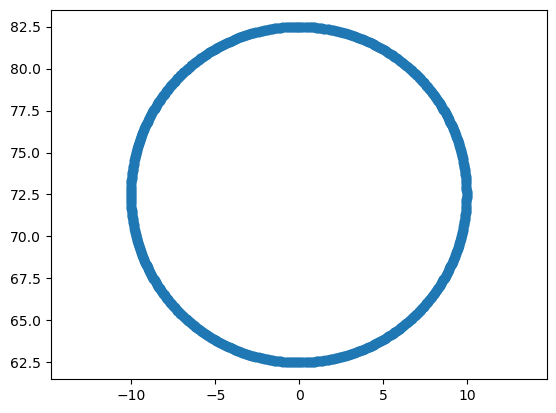

In [64]:
# Plot of the y and z scatter 
plt.axis("equal")
plt.scatter(y_plt, z_plt)


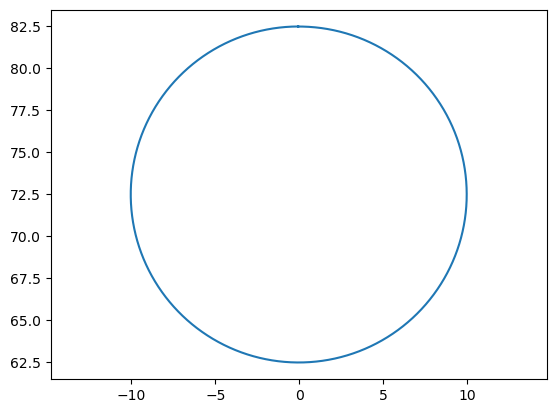

In [65]:
# normal plot for y and z
plt.axis("equal")
plt.plot(y_plt,z_plt)

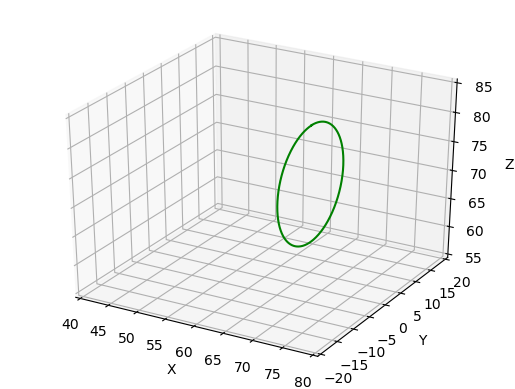

In [66]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt

fig = plt.figure() 
ax = fig.add_subplot(111,projection='3d') 
ax.axes.set_xlim3d(left=40, right=80) 
ax.axes.set_ylim3d(bottom=-20, top=20) 
ax.axes.set_zlim3d(bottom=55, top=85) 
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.plot3D(x_plt,y_plt,z_plt, color="green")
plt.show()